In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [35]:
df=pd.read_csv('/content/tested.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [36]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
a_m=df['Age'].mean()
print(a_m)

30.272590361445783


In [38]:
df['Age'].fillna(a_m,inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
f_m=df['Fare'].mean()
df['Fare'].fillna(f_m,inplace=True)

In [40]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
df[df.select_dtypes(['int64']).columns] = df.select_dtypes(['int64']).apply(lambda x: x.astype('int32'))
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df[df.select_dtypes(['float64']).columns] = df.select_dtypes(['float64']).apply(lambda x: x.astype('float32'))

In [42]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [43]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,1
6,898,1,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,0
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,1
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,2
9,901,0,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,1


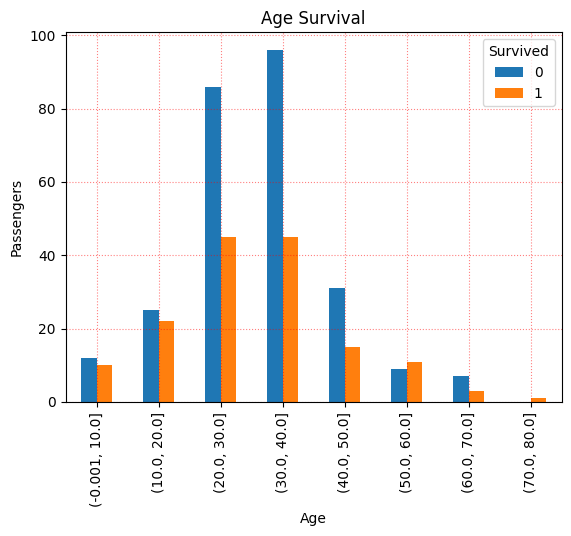

In [74]:
age_grp = pd.cut(df['Age'], bins=range(0, 100, 10), include_lowest=True)
pd.crosstab(age_grp,df.Survived).plot(kind='bar')
plt.ylabel('Passengers')
plt.title('Age Survival')
plt.grid(color="green", linestyle=":", alpha=0.5)

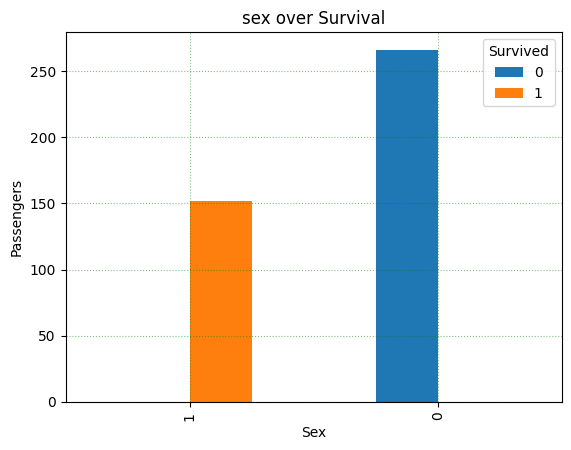

In [78]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind='bar')
plt.ylabel('Passengers')
plt.title('sex over Survival')
plt.grid(color="green", linestyle=":", alpha=0.5)

In [52]:
l=['PassengerId','Name','Ticket','Fare','Survived','Cabin']
x=df.drop(l,axis=1)
print(x.head(10))
y=df['Survived']
print(y.head(10))

   Pclass Sex   Age  SibSp  Parch Embarked
0       3   0  34.5      0      0        0
1       3   1  47.0      1      0        1
2       2   0  62.0      0      0        0
3       3   0  27.0      0      0        1
4       3   1  22.0      1      1        1
5       3   0  14.0      0      0        1
6       3   1  30.0      0      0        0
7       2   0  26.0      1      1        1
8       3   1  18.0      0      0        2
9       3   0  21.0      2      0        1
0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Survived, dtype: int32


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_test)

In [72]:
y_pred=dtc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

100.0


[Text(0.5, 0.75, 'Sex <= 0.5\ngini = 0.47\nsamples = 313\nvalue = [195, 118]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 195\nvalue = [195, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 118\nvalue = [0, 118]')]

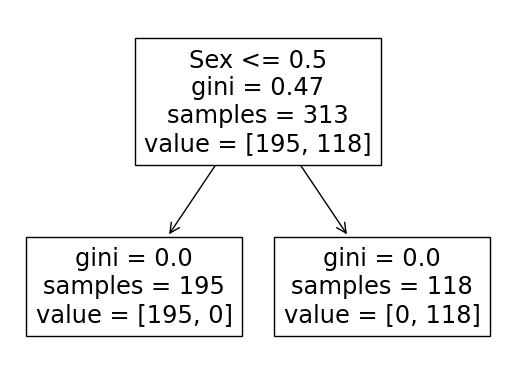

In [73]:
from sklearn import tree
tree.plot_tree(dtc,feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Survived'])